# Logistic Regression

L1 규제: Lasso\
L2 규제: Ridge

로지스틱 회귀는 L2 규제를 사용.\
C 파라미터를 사용해 규제의 강도를 조절.\
C가 높아지면 규제가 완화됨. (릿지의 알파는 높아지면 규제가 세졌다!)

In [6]:
from sklearn.datasets           import load_breast_cancer
from sklearn.linear_model       import LogisticRegression
from sklearn.model_selection    import train_test_split
import matplotlib.pyplot        as plt
import mglearn

In [7]:
X, y = mglearn.datasets.make_forge()
print(X[:5])
print(y[:5])

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
[1 0 1 0 0]


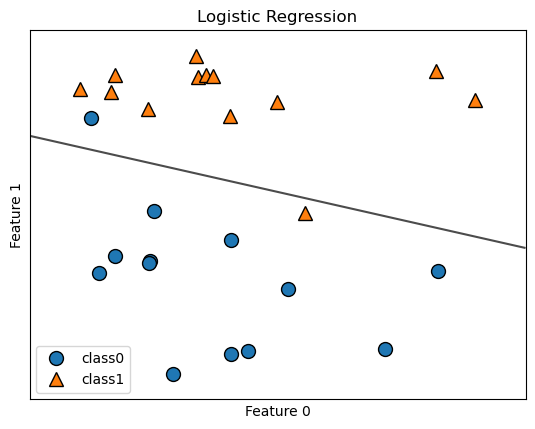

In [8]:
clf = LogisticRegression().fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title("Logistic Regression")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["class0", "class1"])

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
 stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.958
Test set score: 0.958


In [11]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.3f}")

Training set score: 0.986
Test set score: 0.972


In [12]:
logreg100 = LogisticRegression(C=500, max_iter=50000).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_test, y_test):.3f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.3f}")

Training set score: 0.986
Test set score: 0.986


In [13]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print(f"Training set score: {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_test, y_test):.3f}")

Training set score: 0.953
Test set score: 0.951


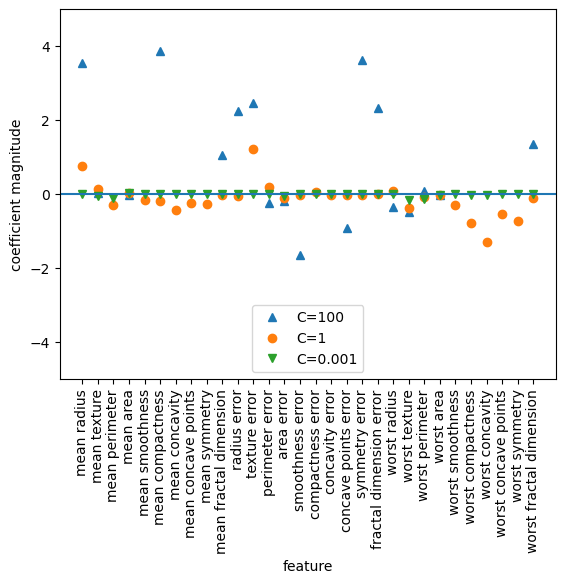

In [14]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coefficient magnitude")
plt.legend()

In [18]:
print(logreg100.coef_)
print(logreg100.coef_.T[:5])

[[ 3.55780576e+00  3.94697562e-02 -2.09502811e-01 -1.64877071e-02
  -9.84083021e+00  3.88018816e+00 -6.18407991e+00 -1.45327804e+01
  -9.49633333e+00  1.06867225e+00  2.24685630e+00  2.46147711e+00
  -2.33208844e-01 -1.74829780e-01 -1.65901033e+00  1.44945517e+01
   1.91462891e+01 -9.16958688e-01  3.62926323e+00  2.33871202e+00
  -3.54373005e-01 -4.80988722e-01  6.92376112e-02 -1.41545989e-02
  -1.88805034e+01  6.27066555e+00 -6.60190869e+00 -2.98685195e+01
  -1.13839177e+01  1.36562036e+00]]
[[ 3.55780576]
 [ 0.03946976]
 [-0.20950281]
 [-0.01648771]
 [-9.84083021]]


In [19]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

Training accuracy of C=0.001: 0.91
Test accuracy of C=0.001: 0.92
Training accuracy of C=1.000: 0.96
Test accuracy of C=1.000: 0.96
Training accuracy of C=100.000: 0.99
Test accuracy of C=100.000: 0.98


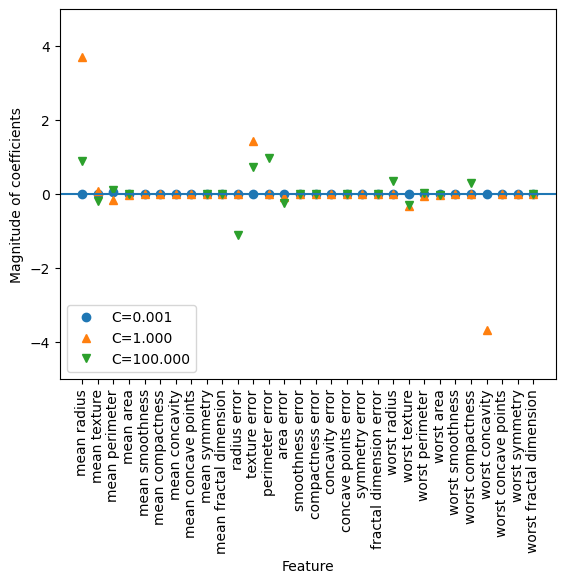

In [20]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("Training accuracy of C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Magnitude of coefficients")
plt.ylim(-5, 5)
plt.legend(loc=3)